In [14]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [15]:
df=pd.read_csv('df_1.csv')
df.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,352.0,175.5,101.757883,0.0,87.75,175.5,263.25,351.0


In [21]:
for i in df['Year'].value_counts().index:
    print(i,df['Year'].value_counts()[i])

2011 34
2020 31
2019 30
2015 28
2013 28
2018 26
2014 25
2012 23
2016 22
2010 19
2008 16
2021 13
2009 13
2007 12
2017 9
2006 7
2005 6
2022 5
2004 2
2019-2020 1
2018-2019 1
2014 and 2015 1


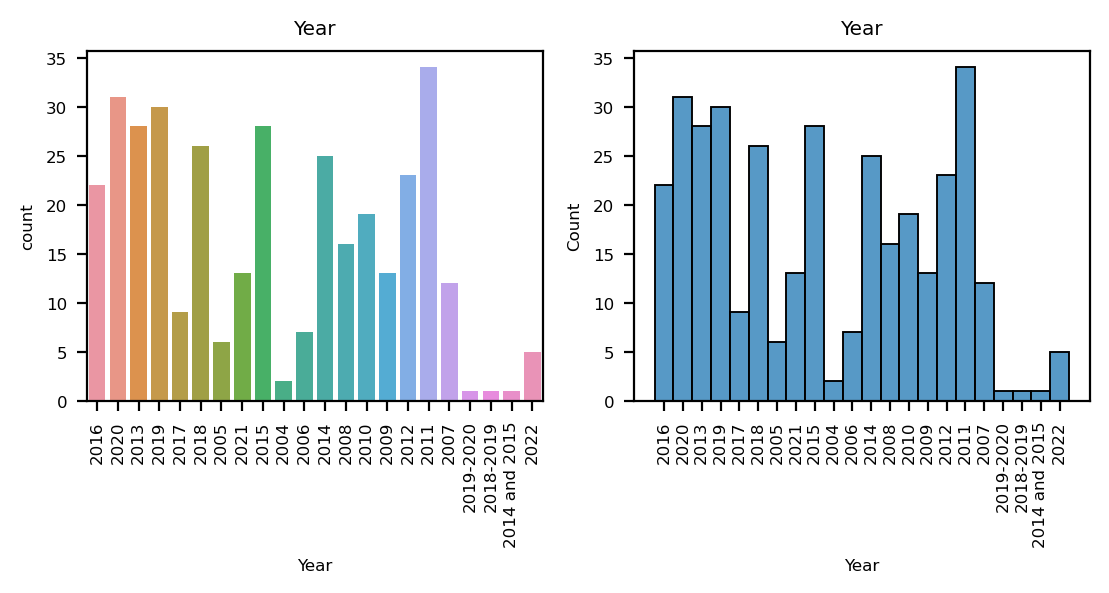

In [22]:
def plot_year(df):
    plt.figure(figsize=(10,5),dpi=200,facecolor='w',edgecolor='k')
    plt.rcParams['font.size']=6
    plt.subplot(2,3,1)
    plt.title("Year")
    sns.countplot(df['Year'])
    plt.xticks(rotation=90)
    plt.subplot(2,3,2)
    plt.title("Year")
    sns.histplot(df['Year'])
    plt.xticks(rotation=90)
    plt.show()
    
 

plot_year(df)

<AxesSubplot:>

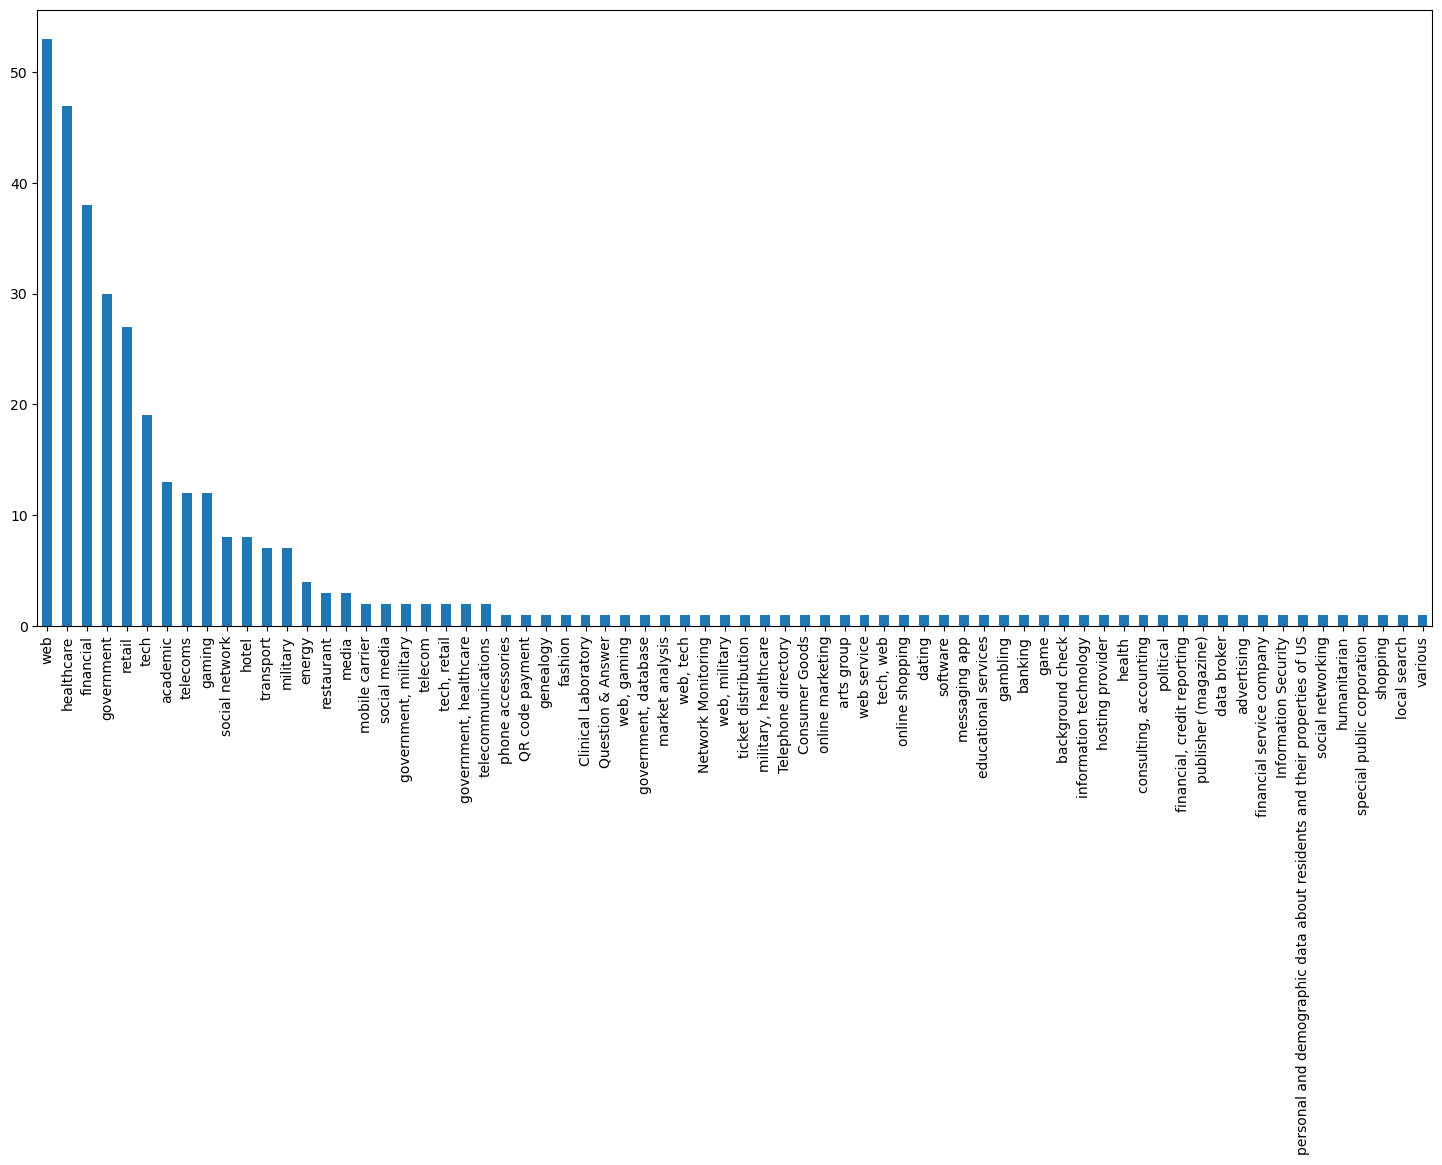

In [19]:
df['Organization type'].value_counts().plot(kind='bar',figsize=(18,8))